<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-11/La2_3_B131a_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 850, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 850 (delta 90), reused 20 (delta 15), pack-reused 710
Receiving objects: 100% (850/850), 42.82 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (459/459), done.
Updating files: 100% (115/115), done.


'/content'

### La2/3 gating, sample B131a

In [3]:
%cd "/content/gator/data/07-11/"

/content/gator/data/07-11


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

Data from the 10/07 afternoon

In [5]:
prep_csv('defbuffer1_0710_162502.csv')
df = pd.read_csv('defbuffer1_0710_162502.csv')


Fill Mode,1



In [6]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,2.866338e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000025,Volt DC,10,T,2W,F,F,0.000000
1,2.908972e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000030,Volt DC,10,T,2W,F,F,0.069399
2,2.947439e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000026,Volt DC,10,T,2W,F,F,0.138753
3,2.894843e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000026,Volt DC,10,T,2W,F,F,0.208100
4,2.913310e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,-0.000029,Volt DC,10,T,2W,F,F,0.277438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53200,3.572088e-05,Amp DC,1.000000e-04,5.5,F,F,F,F,F,F,...,F,Main,0.999750,Volt DC,10,T,2W,F,F,3692.281363
53201,3.564908e-05,Amp DC,1.000000e-04,5.5,F,F,F,F,F,F,...,F,Main,0.999766,Volt DC,10,T,2W,F,F,3692.350697
53202,3.573762e-05,Amp DC,1.000000e-04,5.5,F,F,F,F,F,F,...,F,Main,0.999755,Volt DC,10,T,2W,F,F,3692.420039
53203,3.568911e-05,Amp DC,1.000000e-04,5.5,F,F,F,F,F,F,...,F,Main,0.999758,Volt DC,10,T,2W,F,F,3692.489360


In [7]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading']*1e9

# Potential (mV)
V = df['Value']

Text(0.5, 0, 'Time (s)')

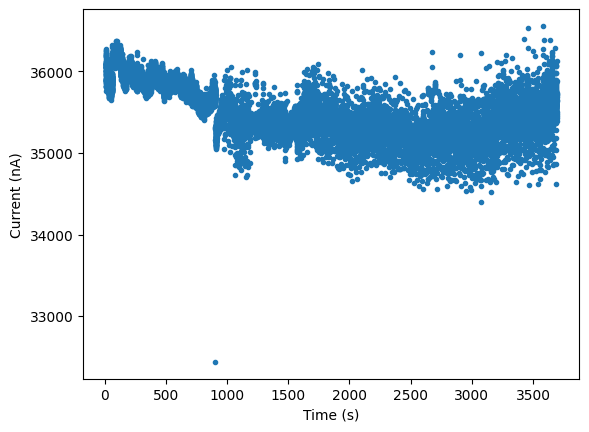

In [8]:
cut1 = 0
cut2 = -1
I_numeric = np.array(I, dtype=float)

mask = I_numeric > 300
T=T[mask]
I=I_numeric[mask]
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

In [9]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value'] * 100
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-9-e44d9732e7c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


In [10]:
# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()

We can see a periodicity of 10s in how the current reacts to gating. Howerver, we do not obtain the same results as the ones we had for LiTa03. The current positive and negative spikes are very brief

Text(0.5, 0, 'Time (s)')

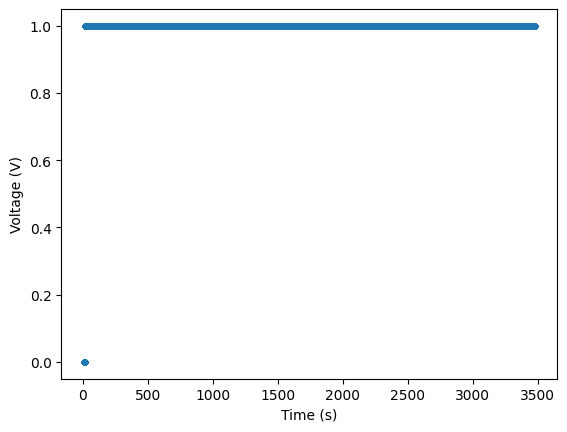

In [14]:
min_length = min(len(T), len(V))
T_trimmed = T[:min_length]
V_trimmed = V[:min_length]
cut1 = 0
cut2 = 50000
#V_numeric = np.array(V, dtype=float)

#mask = V_numeric < 1
#T=T[mask]
#V=V_numeric[mask]

plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

Data from the 11/07 morning

In [15]:
prep_csv('defbuffer1_0711_093023.csv')
df2 = pd.read_csv('defbuffer1_0711_093023.csv')

Fill Mode,1



In [16]:
df2

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999754,Volt DC,10,T,2W,F,F,62410.094782
1,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999757,Volt DC,10,T,2W,F,F,62410.164122
2,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999759,Volt DC,10,T,2W,F,F,62410.233465
3,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999755,Volt DC,10,T,2W,F,F,62410.302810
4,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999759,Volt DC,10,T,2W,F,F,62410.372151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999762,Volt DC,10,T,2W,F,F,62409.748111
99996,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999764,Volt DC,10,T,2W,F,F,62409.817447
99997,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999768,Volt DC,10,T,2W,F,F,62409.886776
99998,0.000033,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999766,Volt DC,10,T,2W,F,F,62409.956106


In [17]:
# Time (s)
T = df2['Relative Time']

# Current (mA)
I = df2['Reading']

# Potential (V)
V = df2['Value']

Text(0.5, 0, 'Time (s)')

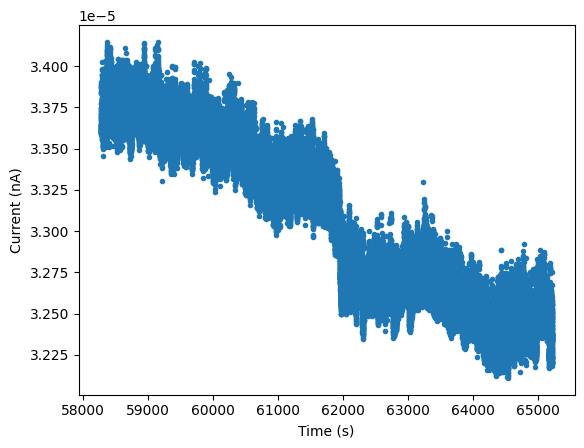

In [18]:

cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

In [19]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value'] * 100
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-19-e44d9732e7c6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()

In [ ]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

### Measuring the current between gate and drain

In [ ]:
prep_csv('defbuffer1_0625_101051.csv')
df3 = pd.read_csv('defbuffer1_0625_101051.csv')

In [ ]:
df3

In [ ]:
# Time (s)
T = df3['Relative Time']

# Current (mA)
I = df3['Reading']

# Potential (mV)
V = df3['Value']

In [ ]:


cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Mystery : when the gating voltage is applied (75%), the current measured between gate and drain is negative  
This means the Li+ go out of our crystal when we're applying a positive gating voltage, which is not what's supposed to happen

In [ ]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

In [ ]:
prep_csv('defbuffer1_0625_130822.csv')
df4 = pd.read_csv('defbuffer1_0625_130822.csv')

In [ ]:
df4

In [ ]:
# Time (s)
T = df4['Relative Time']

# Current (mA)
I = df4['Reading']

# Potential (mV)
V = df4['Value']

In [ ]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

# EIS on gated sample

In [ ]:
!pip install impedance -q


In [ ]:
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit

In [ ]:
%ls


In [ ]:
freqs, Z = preprocessing.readZPlot('LiTao3_htol.z')
freqs, Z = np.delete(freqs, 32), np.delete(Z, 32) # remove 1 noise point (argmin(Z.imag))


plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
freqs, Z = preprocessing.readZPlot('LiTao3_ltoh.z')
freqs, Z = np.delete(freqs, 28), np.delete(Z, 28) # remove 1 noise point (argmin(Z.imag))


plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
circuit = 'p(R0,CPE0)'
init = [1e6,1e-2,1]

circuit = CustomCircuit(circuit, initial_guess=init)


In [ ]:
circuit.fit(freqs, Z)

In [ ]:
Z_fit = circuit.predict(freqs)

plt.plot(Z_fit.real, -Z_fit.imag, 'o')
plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

In [ ]:
print(circuit)